# Week 3 Assignment
**July 3rd, 2017**

*Youssef Kaddoura*

### This Jupyter Notebook show's how to plot NEON RGB camera data

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Defining the Function RGB_Raster to Array
**RGBraster2array reads in a NEON AOP geotif file and returns** 
**a numpy array, and header containing associated metadata with spatial information.**
  

In [9]:
  """
    --------
    Parameters
      RGB_geotif -- full or relative path and name of reflectance hdf5 file*
    --------
    Returns 
    --------
    array:
        numpy array of geotif values 
    metadata:
         dictionary containing the following metadata (all strings):
             array_rows
             array_cols
             bands
             driver
             projection
             geotransform 
             pixelWidth 
             pixelHeight 
             extent
             noDataValue  
             scaleFactor  """
def RGBraster2array(RGB_geotif):
    metadata = {}
    dataset = gdal.Open(RGB_geotif)
    # I added this line for tracing
    if dataset is None:
        print('dataset is not read properly')
        sys.exit(1)
    metadata['array_rows'] = dataset.RasterYSize
    metadata['array_cols'] = dataset.RasterXSize
    metadata['bands'] = dataset.RasterCount
    metadata['driver'] = dataset.GetDriver().LongName
    metadata['projection'] = dataset.GetProjection()
    metadata['geotransform'] = dataset.GetGeoTransform()

    mapinfo = dataset.GetGeoTransform()
    metadata['pixelWidth'] = mapinfo[1]
    metadata['pixelHeight'] = mapinfo[5]

    metadata['ext_dict'] = {}
    metadata['ext_dict']['xMin'] = mapinfo[0]
    metadata['ext_dict']['xMax'] = mapinfo[0] + dataset.RasterXSize/mapinfo[1]
    metadata['ext_dict']['yMin'] = mapinfo[3] + dataset.RasterYSize/mapinfo[5]
    metadata['ext_dict']['yMax'] = mapinfo[3]

    metadata['extent'] = (metadata['ext_dict']['xMin'],metadata['ext_dict']['xMax'],
                          metadata['ext_dict']['yMin'],metadata['ext_dict']['yMax'])

    raster = dataset.GetRasterBand(1)
    array_shape = raster.ReadAsArray(0,0,metadata['array_cols'],metadata['array_rows']).astype(np.float).shape
    metadata['noDataValue'] = raster.GetNoDataValue()
    metadata['scaleFactor'] = raster.GetScale()

    array = np.zeros((array_shape[0],array_shape[1],dataset.RasterCount),'uint8') #pre-allocate stackedArray matrix
    for i in range(1, dataset.RasterCount+1):
        band = dataset.GetRasterBand(i).ReadAsArray(0,0,metadata['array_cols'],metadata['array_rows']).astype(np.float)
        band[band==metadata['noDataValue']]=np.nan
        band = band/metadata['scaleFactor']
        array[...,i-1] = band

    return array, metadata

In [10]:
from osgeo import gdal,osr
import sys

In [11]:
#RGB_geotif = 'C:\\Users\\GoGators\\Desktop\\2017_SERC_2_368000_4306000_image.tif'
SERC_RGBcam_array, SERC_RGBcam_metadata = RGBraster2array('2017_SERC_2_368000_4306000_image.tif')

In [12]:
print(SERC_RGBcam_array.shape)

(10000, 10000, 3)


In [13]:
#Display information stored in header
for key in sorted(SERC_RGBcam_metadata.keys()):
  print(key)

array_cols
array_rows
bands
driver
ext_dict
extent
geotransform
noDataValue
pixelHeight
pixelWidth
projection
scaleFactor


### Defining the Function that will Plot any Image/Band

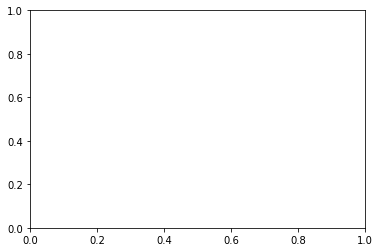

In [14]:
def plot_band_array(band_array,
                    refl_extent,
                    colorlimit,
                    ax=plt.gca(),
                    title='',
                    cbar ='on',
                    cmap_title='',
                    colormap='spectral'):

    '''plot_band_array reads in and plots a single band or an rgb band combination of a reflectance array
    --------
    Parameters
    --------
        band_array: flightline array of reflectance values, created from h5refl2array function
        refl_extent: extent of reflectance data to be plotted (xMin, xMax, yMin, yMax) - use metadata['extent'] from h5refl2array function
        colorlimit: range of values to plot (min,max). Best to look at the histogram of reflectance values before plotting to determine colorlimit.
        ax: optional, default = current axis
        title: string, optional; plot title
        cmap_title: string, optional; colorbar title
        colormap: string, optional; see https://matplotlib.org/examples/color/colormaps_reference.html for list of colormaps
    --------
    Returns 
        plots array of single band or RGB if given a 3-band 
    --------
    Example:
    --------
    plot_band_array(SERC_RGBcam_array, 
                    SERC_RGBcam_metadata['extent'],
                    (1,255),
                    title='SERC RGB Camera Tile',
                    cbar='off')'''

    plot = plt.imshow(band_array,extent=refl_extent,clim=colorlimit); 
    if cbar == 'on':
        cbar = plt.colorbar(plot,aspect=40); plt.set_cmap(colormap); 
        cbar.set_label(cmap_title,rotation=90,labelpad=20)
    plt.title(title); ax = plt.gca(); 
    ax.ticklabel_format(useOffset=False, style='plain'); #do not use scientific notation #
    rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90); #rotate x tick labels 90 degrees

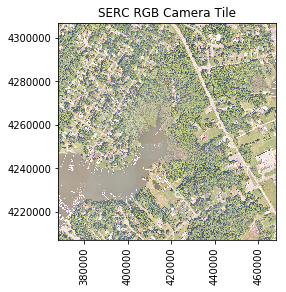

In [15]:
plot_band_array(SERC_RGBcam_array,
                SERC_RGBcam_metadata['extent'],
                (1,255),
                title='SERC RGB Camera Tile',
                cbar='off') 

Text(0,0.5,'Frequency')

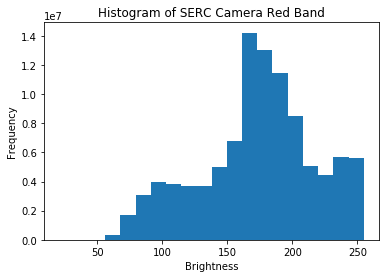

In [19]:
plt.hist(np.ravel(SERC_RGBcam_array[:,:,0]),20);
plt.title('Histogram of SERC Camera Red Band')
#Challenge Exercises
#Now that you've followed along to read in and plot an RGB camera image and band, try the following exercises on your own:

#Plot histograms of the green and blue bands.
plt.xlabel('Brightness'); plt.ylabel('Frequency')

## Challenge Exercises
### 1. Plotting Histogrames of the Green and Blue Bands

Text(0,0.5,'Frequency')

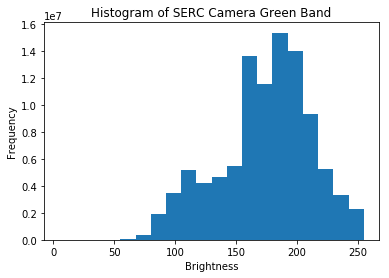

In [20]:
#Challenge Exercises
#Now that you've followed along to read in and plot an RGB camera image and band, try the following exercises on your own:

# 1.Plot histograms of the green and blue bands.

plt.hist(np.ravel(SERC_RGBcam_array[:,:,1]),20);
plt.title('Histogram of SERC Camera Green Band')
plt.xlabel('Brightness'); plt.ylabel('Frequency')

Text(0,0.5,'Frequeimport numpy as npncy')

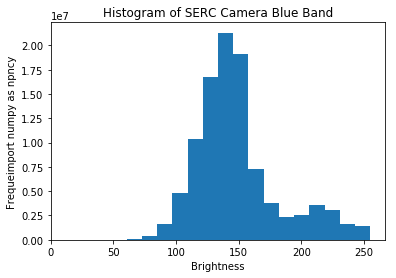

In [21]:
plt.hist(np.ravel(SERC_RGBcam_array[:,:,2]),20);
plt.title('Histogram of SERC Camera Blue Band')
plt.xlabel('Brightness'); plt.ylabel('Frequeimport numpy as npncy')

In [22]:
import numpy as np

### 2.a.1-RED BAND -Minimum and Maximum Reflectance

In [23]:
# 2.Explore the data to see what you can learn about the SERC_RGBcam_array and associated SERC_RGBcam_metadata.
#      a. Determine the minimum and maximum reflectance for each band. Print these values with a print statement. 
#         HINT: Use the numpy functions np.amin() and np.amax()

min_RED = np.amin(SERC_RGBcam_array[:,:,0])
max_RED = np.amax(SERC_RGBcam_array[:,:,0])

print('The minimum reflectance for RED Band is', min_RED) 
print('The maximum reflectance for RED Band is ', max_RED)




The minimum reflectance for RED Band is 21
The maximum reflectance for RED Band is  255


### 2.a.2-GREEN BAND -Minimum and Maximum Reflectance

In [24]:
min_GREEN = np.amin(SERC_RGBcam_array[:,:,1])
max_GREEN = np.amax(SERC_RGBcam_array[:,:,1])

print('The minimum reflectance for RED Band is ',min_GREEN) 
print('The maximum reflectance for RED Band is ',max_GREEN)



The minimum reflectance for RED Band is  5
The maximum reflectance for RED Band is  255


### 2.a.3-BLUE BAND -Minimum and Maximum Reflectance

In [25]:
min_BLUE = np.amin(SERC_RGBcam_array[:,:,2])
max_BLUE = np.amax(SERC_RGBcam_array[:,:,2])

print('The minimum reflectance for RED Band is ', min_BLUE) 
print('The maximum reflectance for RED Band is ',max_BLUE)

The minimum reflectance for RED Band is  12
The maximum reflectance for RED Band is  255


### 2.b. Determing UTM zone 

In [65]:
# b. What UTM zone is this data in? Hint: Print out SERC_RGBcam_metadata['projection']
image_projection = SERC_RGBcam_metadata['projection']
#print(image_Projection)
src = osr.SpatialReference(wkt = image_projection)
#src.ImportFromWkt(wkt)
if src.IsProjected:
    print (src.GetAttrValue('PROJCS'))

WGS 84 / UTM zone 18N


### 2.c.1- Plotting RED BAND

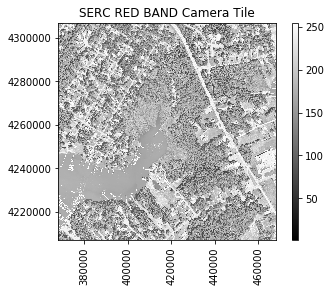

In [27]:
# c. Use the plot_band_array function to plot each band of the camera image separately. 
# HINT: Use splicing to extract each band (e.g., SERC_RGBcam_array[:,:,0]).

plot_band_array(SERC_RGBcam_array[:,:,0],
                SERC_RGBcam_metadata['extent'],
                (1,255),
                title='SERC RED BAND Camera Tile',
                cbar='on',
               colormap='gray')


### 2.c.2- Plotting GREEN BAND

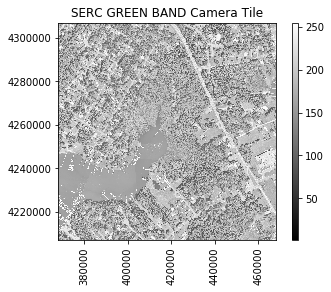

In [31]:
plot_band_array(SERC_RGBcam_array[:,:,1],
                SERC_RGBcam_metadata['extent'],
                (1,255),
                title='SERC GREEN BAND Camera Tile',
                cbar='on',
               colormap='gray')

### 2.c.3- Plotting BLUE BAND

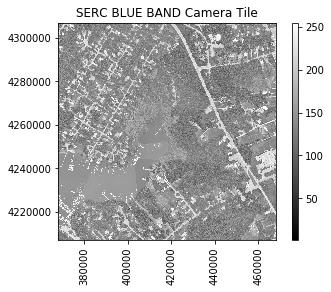

In [32]:
plot_band_array(SERC_RGBcam_array[:,:,2],
                SERC_RGBcam_metadata['extent'],
                (1,255),
                title='SERC BLUE BAND Camera Tile',
                cbar='on',
               colormap='gray')